In [1]:
from entities import *
from constants import TEAMS_DATA, STAT_EFFECTS, POSSESSIONS_STD_DEV
from simulations import *

import pickle
import numpy as np
import pandas as pd

In [2]:
with open(TEAMS_DATA, 'rb') as f:
    teams = pickle.load(f)

with open(STAT_EFFECTS, 'rb') as f:
    stats = pickle.load(f)

In [10]:
test = simulate_n_games(teams['Kansas'], teams['Connecticut'], 500, summary=True)

Simulating Game: Kansas vs. Connecticut


100%|██████████| 500/500 [00:06<00:00, 74.72it/s]


Preparing simulation analysis...
Connecticut edges Kansas in the simulation, riding superior efficiency, balanced scoring, plus stronger rebounding and turnover discipline; Kansas pushes tempo but falters in efficiency and defensive consistency overall.
Kansas vs. Connecticut Complete!


In [11]:
test['Record']

'Kansas: 232 - 268 :Connecticut'

In [12]:
test['Contributions']

,Team,2P,2PA,3P,3PA,BLK,STL,TOV,ORB,DRB,PF,Games Played
Bryson Tiller,Kansas,1420,2568,381,1308,832,47,879,546,2734,1260,353
Elmarko Jackson,Kansas,548,1712,411,1097,346,211,692,76,1174,1174,287
Flory Bidunga,Kansas,3175,5274,0,53,1272,265,927,1378,3233,1219,393
Jamari McDowell,Kansas,66,200,741,1821,140,400,480,140,1020,820,297
Kohl Rosario,Kansas,736,736,606,2290,139,278,537,537,677,1214,295
Alex Karaban,Connecticut,1478,2598,1018,2341,599,456,342,913,1827,1170,424
Eric Reibe,Connecticut,2667,3899,204,544,884,204,544,952,2199,1428,336
Jaylin Stewart,Connecticut,969,1487,584,1820,384,512,641,512,2077,1307,380
Malachi Smith,Connecticut,721,2305,641,1212,71,499,713,356,998,784,353
Solomon Ball,Connecticut,1701,2816,1169,4031,165,469,828,414,1518,1104,410


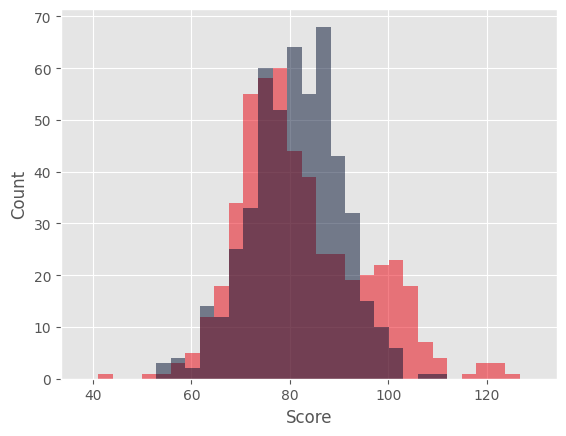

In [13]:
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('ggplot')

kansas = test['Scores']['Kansas']
uconn = test['Scores']['Connecticut']

min_score = min(kansas + uconn)
max_score = max(kansas + uconn)
bins = np.linspace(min_score-5, max_score+5, 32)

plt.hist(kansas, bins=bins, color='#e8000d', alpha=0.5)
plt.hist(uconn, bins=bins, color='#000E2F', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [14]:
test['Analysis']

'Connecticut edges Kansas in the simulation, riding superior efficiency, balanced scoring, plus stronger rebounding and turnover discipline; Kansas pushes tempo but falters in efficiency and defensive consistency overall.'

In [15]:
print(
f"""
{test['Team 1'].name} has won {test['Win Count 1']} games ({round(test['Team 1 Win Pct'] * 100, 2)}%)
{test['Team 2'].name} has won {test['Win Count 2']} games ({round(test['Team 2 Win Pct'] * 100, 2)}%)

Overall winner: {test['Winner']}
""")


Kansas has won 232 games (46.0%)
Connecticut has won 268 games (54.0%)

Overall winner: Connecticut

